In [2]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

import joblib

from sklearn.inspection import plot_partial_dependence

# Function

In [93]:
def plot_scatter(split, fn, fp):
    val_path = "../kitt/DATA_progress3_new/{}/val/val.csv".format(split)
    val_data = pd.read_csv(val_path)
    train_path = "../kitt/DATA_progress3_new/{}/train/train_oversampling.csv".format(split)
    train_data = pd.read_csv(train_path)
    
    # false negative : truth=M predicted=B
    
#     col = ['texture_mean', 'area_mean', 'smoothness_mean',
#        'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
#        'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
#        'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
#        'symmetry_worst', 'fractal_dimension_worst']
    
    x_col = 'smoothness_mean'
    y_col = 'area_mean'
    
    # Get the false predictions data from the original data using the indices of false predictions
    fn = val_data.iloc[fn]
    fp = val_data.iloc[fp]
     
    # Get the true predictions data from the original data using the indices of true predictions
    benign_data = train_data[229:]
    malignant_data= train_data[:228]
#     for i in col:
#         x_col = i
#         for j in col:
#             y_col = j

    # Create the scatter plot with false predictions data as red dots and true predictions data as blue dots
    plt.scatter(benign_data[x_col], benign_data[y_col], color='blue', label='True Negative', alpha=0.5)
    plt.scatter(malignant_data[x_col], malignant_data[y_col], color='green', label='True Positive', alpha=0.5)
    plt.scatter(fn[x_col], fn[y_col], color='yellow', label='False Negative')
    plt.scatter(fp[x_col], fp[y_col], color='red', label='False Positive')

    # Add legend and labels
    plt.legend()
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Show the plot
    plt.show()

# split 1

In [94]:
split = 'split1'
val_data = pd.read_csv("../kitt/DATA_progress3_new/split1/val/val.csv")

In [95]:
fp = [8, 45]
fn =[79, 81]
val_data.loc[fp+fn]

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
8,906564,B,13.98,656.1,0.10310,0.14500,0.2086,0.07406,1.5110,49.45,0.009976,0.05278,0.02653,0.005444,0.1312,0.3219,0.2827,0.09208
45,901549,B,12.96,386.3,0.12370,0.07900,0.2018,0.06914,0.9858,16.04,0.006635,0.02101,0.02108,0.003721,0.1610,0.2247,0.3343,0.09215
79,868202,M,22.47,506.3,0.09055,0.04711,0.1585,0.06065,1.3800,19.87,0.007499,0.02332,0.01647,0.002629,0.1419,0.2177,0.2829,0.08067
81,862548,M,19.77,642.5,0.09752,0.09388,0.1879,0.06390,1.8510,26.85,0.008005,0.03321,0.01462,0.004452,0.1431,0.3194,0.2718,0.09353


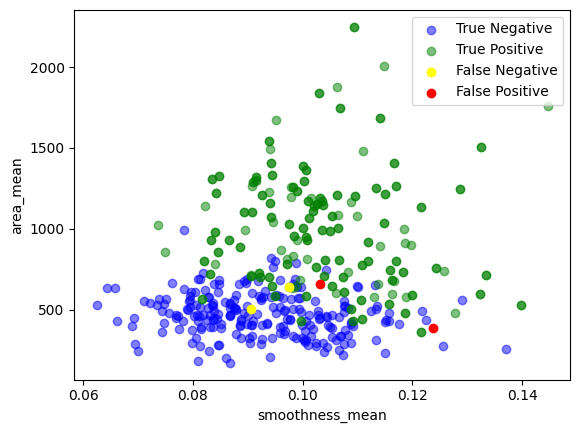

In [96]:
plot_scatter(split, fn, fp) 
# texture_mean, area_mean

# split 2

In [78]:
split = 'split2'
val_data = pd.read_csv("../kitt/DATA_progress3_new/split2/val/val.csv")

In [79]:
fp = [11, 29]
fn = []
val_data.loc[fp+fn]

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
11,859471,B,17.33,250.5,0.1066,0.31300,0.2111,0.08046,1.194,17.67,0.009549,0.30380,0.04197,0.009559,0.1482,1.2520,0.4228,0.11750
29,9010259,B,18.59,512.0,0.1082,0.09603,0.2035,0.06501,1.510,21.57,0.007807,0.05112,0.02860,0.005715,0.1343,0.2573,0.3113,0.08317


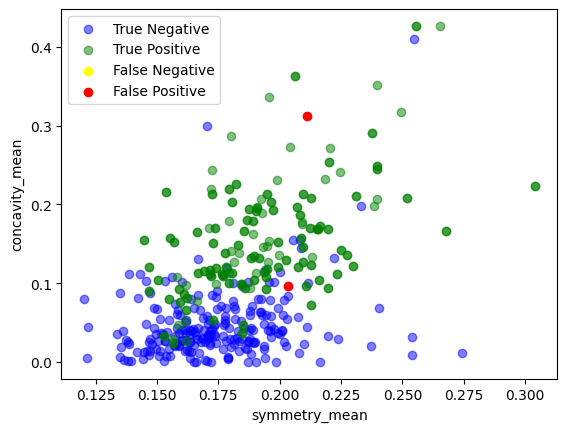

In [80]:
plot_scatter(split, fn, fp)
# smoothness_mean, area_mean

# split 3

In [82]:
split = 'split3'
val_data = pd.read_csv("../kitt/DATA_progress3_new/split3/val/val.csv")

In [83]:
fp = [9, 25, 28]
fn = [87]
val_data.loc[fp+fn]

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
9,912600,B,11.28,747.2,0.10430,0.11910,0.1784,0.06259,0.3871,13.87,0.006034,0.03336,0.01175,0.002256,0.1541,0.4004,0.2557,0.08181
25,88147202,B,23.97,496.4,0.07903,0.05438,0.1514,0.06019,1.0660,18.51,0.005169,0.03016,0.01365,0.003407,0.1227,0.3911,0.2826,0.09585
28,911366,B,18.18,408.8,0.11750,0.10200,0.1957,0.07255,1.7400,27.85,0.014590,0.04961,0.01807,0.005217,0.1780,0.3186,0.2660,0.09270
87,892189,M,18.14,431.1,0.09968,0.02685,0.1619,0.06287,2.1050,49.11,0.005596,0.01272,0.01575,0.002758,0.1137,0.0612,0.1978,0.06915


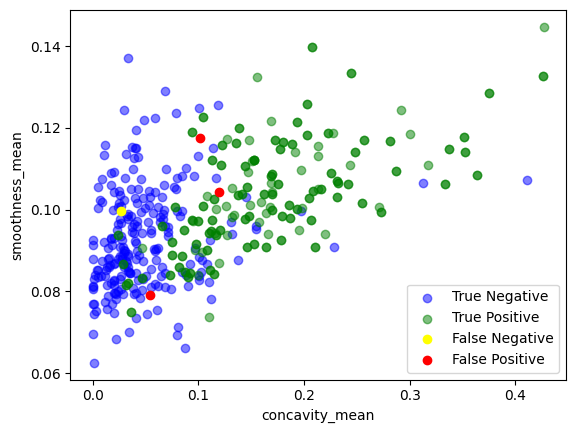

In [84]:
plot_scatter(split, fn, fp)

# split 4

In [86]:
split = 'split4'
val_data = pd.read_csv("../kitt/DATA_progress3_new/split4/val/val.csv")

In [87]:
fp = []
fn = [70]
val_data.loc[fp+fn]

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
70,859983,M,15.79,584.1,0.1007,0.07789,0.1662,0.06566,0.6205,23.35,0.004717,0.01759,0.0122,0.00313,0.1411,0.2779,0.2589,0.103


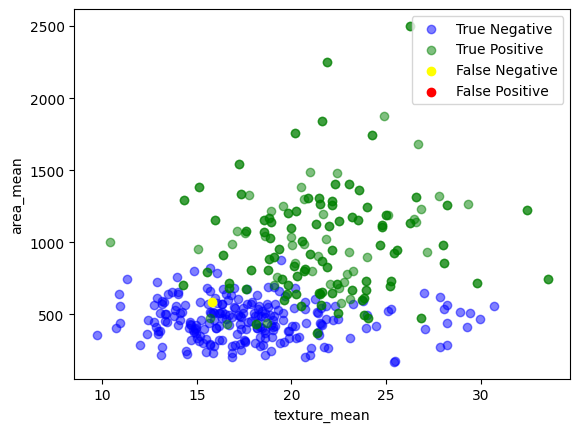

In [88]:
plot_scatter(split, fn, fp)

# split 5

In [90]:
split = 'split5'
val_data = pd.read_csv("../kitt/DATA_progress3_new/split5/val/val.csv")

In [91]:
fp = [22, 43, 46]
fn = []
val_data.loc[fp+fn]

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
22,8915,B,19.10,687.3,0.08992,0.05940,0.1879,0.05852,0.9480,24.87,0.005332,0.01536,0.01522,0.002815,0.1313,0.1804,0.2962,0.08472
43,9113455,B,20.74,536.9,0.08675,0.10850,0.1562,0.06020,0.7884,27.40,0.007295,0.04615,0.01561,0.003230,0.1351,0.4504,0.2563,0.08174
46,914333,B,20.21,680.9,0.09587,0.06824,0.1487,0.05748,1.6360,21.84,0.005415,0.02153,0.01959,0.001812,0.1216,0.1700,0.2369,0.06599


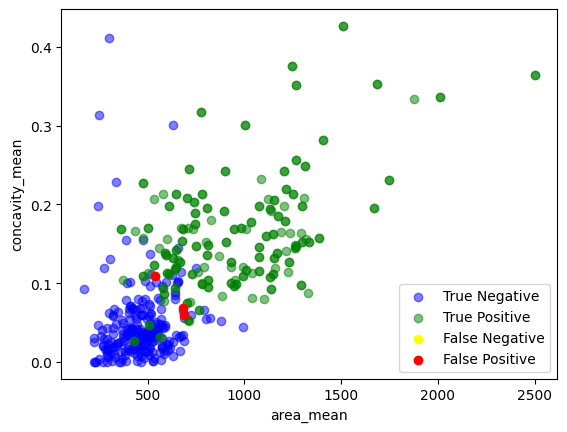

In [92]:
plot_scatter(split, fn, fp)

# Overall

param1
split1
Sensitivity: 94.12%
Specificity: 96.49%
Accuracy: 95.60%
Precision: 94.12%
Sensitivity: 94.12%
Precision: 94.12%
F1: 94.12%

split2
Sensitivity: 100.00%
Specificity: 96.49%
Accuracy: 97.80%
Precision: 94.44%
Sensitivity: 100.00%
Precision: 94.44%
F1: 97.14%

split3
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split4
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%

split5
Sensitivity: 100.00%
Specificity: 94.74%
Accuracy: 96.70%
Precision: 91.89%
Sensitivity: 100.00%
Precision: 91.89%
F1: 95.77%

overall
sensitivity: 97.65 ± 2.46%
specificity: 96.49 ± 2.15%
accuracy: 96.92 ± 1.43%
precision: 94.42 ± 3.36%
f1_score: 95.97 ± 1.88%


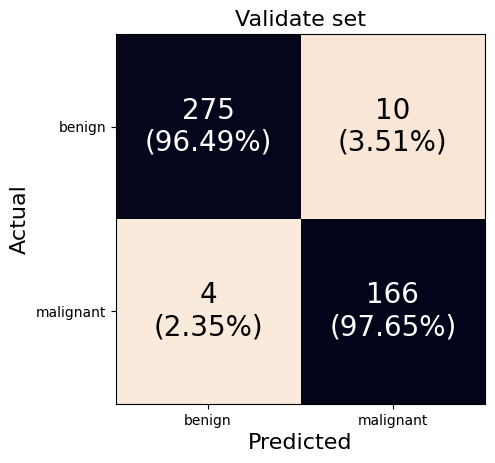

AUC2: 9714.14 ± 144.36%
../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.9412
../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0351
TPR: 1.0000
../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//te

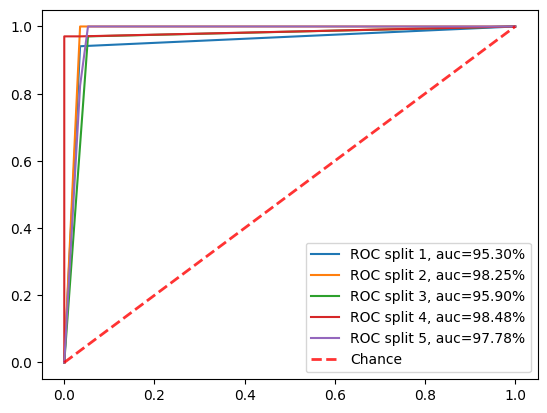

In [9]:
print("param1")
plot(param1_split1_cm_val , param1_split2_cm_val , param1_split3_cm_val , param1_split4_cm_val , param1_split5_cm_val)
Mean_SD("AUC2",param1_split1_AUC_val*100, param1_split2_AUC_val*100, param1_split3_AUC_val*100, param1_split4_AUC_val*100, param1_split5_AUC_val*100)
ROC_split(1)

In [ ]:
test_path = "../kitt/DATA_progress3_new/test.csv"
test_data = pd.read_csv(test_path)
train_path = "../kitt/DATA_progress3_new/train.csv"
train_data = pd.read_csv(train_path)
# false negative : truth=M predicted=B

# col = ['texture_mean', 'area_mean', 'smoothness_mean',
#    'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
#    'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
#    'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
#    'symmetry_worst', 'fractal_dimension_worst']

x_col = 'symmetry_worst'
y_col = 'concavity_mean'

fn = [110]
fp = [2]

# Get the false predictions data from the original data using the indices of false predictions
fn = test_data.iloc[fn]
fp = test_data.iloc[fp]

# Get the true predictions data from the original data using the indices of true predictions
benign_data = train_data[train_data["diagnosis"] == 'B']
malignant_data= train_data[train_data["diagnosis"] == 'M']


# Create the scatter plot with false predictions data as red dots and true predictions data as blue dots
plt.scatter(benign_data[x_col], benign_data[y_col], color='blue', label='True Negative', alpha=0.5)
plt.scatter(malignant_data[x_col], malignant_data[y_col], color='green', label='True Positive', alpha=0.5)
plt.scatter(fn[x_col], fn[y_col], color='yellow', label='False Negative')
plt.scatter(fp[x_col], fp[y_col], color='red', label='False Positive')

# Add legend and labels
plt.legend()
plt.xlabel(x_col)
plt.ylabel(y_col)

# Show the plot
plt.show()

In [1]:
def false_predict(y_true, y_pred, split="test"):
    """
    Compares two arrays and returns the indices of false predictions.
    Args:
        y_true: true labels
        y_pred: predicted labels
    Returns:
        The indices of false predictions.
    """
    col = ['texture_mean', 'area_mean', 'smoothness_mean',
   'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
   'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
   'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
   'symmetry_worst', 'fractal_dimension_worst']
    
    path = "../kitt/DATA_progress3/"
    if split == "test":
        train_path = "{}/train.csv".format(path)
        train_data = pd.read_csv(train_path)
    else:
        train_path = "{}/{}/train/train.csv".format(path,split)
        train_data = pd.read_csv(train_path)  
    false_positive = []
    false_negative = []
    if split == "test":
        test_path =  "{}/test.csv".format(path)
        test_data = pd.read_csv(test_path)
        for i in range(len(y_true)):
            if y_true[i] != y_pred[i]:
                if y_pred[i] == 1:
                    false_positive.append(i)
                if y_pred[i] == 0:
                    false_negative.append(i)
        false_positive_df = test_data.loc[false_positive]
        false_negative_df = test_data.loc[false_negative]
        M_data = train_data[train_data["diagnosis"]=="M"]
        B_data = train_data[train_data["diagnosis"]=="B"]
    elif "split" in split:
        val_path =  "{}/{}/val/val.csv".format(path,split)
        val_data = pd.read_csv(val_path)
        false_indices = []
        for i in range(len(y_true)):
            if y_true[i] != y_pred[i]:
                if y_pred[i] == 1:
                    false_positive.append(i)
                if y_pred[i] == 0:
                    false_negative.append(i)
        false_positive_df = val_data.loc[false_positive]
        false_negative_df = val_data.loc[false_negative]
        M_data = train_data[train_data["diagnosis"]=="M"]
        B_data = train_data[train_data["diagnosis"]=="B"]
    for i in range(len(col) - 1):
        
        x_col, y_col = col[i], col[i+1]
        # Create the scatter plot with false predictions data as red dots and true predictions data as blue dots
        plt.scatter(B_data[x_col], B_data[y_col], color='blue', label='True Negative', alpha=0.5)
        plt.scatter(M_data[x_col], M_data[y_col], color='green', label='True Positive', alpha=0.5)
        plt.scatter(false_negative_df[x_col], false_negative_df[y_col], color='yellow', label='False Negative Predictions')
        plt.scatter(false_positive_df[x_col], false_positive_df[y_col], color='red', label='False Positive Predictions') 
        # Add legend and labels
        plt.legend()
        plt.title(split)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        # Show the plot
        plt.show()